In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import yaml
import warnings
import datetime
import sklearn
import seaborn as sns
import datetime
from datetime import date, datetime, timedelta

warnings.filterwarnings("ignore")
plt.style.use('ggplot')

### collect data from CSV

https://www.kaggle.com/manishkc06/startup-success-prediction

In [2]:
startup = pd.read_csv('data//in//startup_data.csv')

In [3]:
startup.head(5)

,unamed:0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1.0,...,c:6669,0.0,1.0,0.0,0.0,0.0,0.0,1.0000,0.0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1.0,...,c:16283,1.0,0.0,0.0,1.0,1.0,1.0,4.7500,1.0,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1.0,...,c:65620,0.0,0.0,1.0,0.0,0.0,0.0,4.0000,1.0,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1.0,...,c:42668,0.0,0.0,0.0,1.0,1.0,1.0,3.3333,1.0,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0.0,...,c:65806,1.0,1.0,0.0,0.0,0.0,0.0,1.0000,1.0,closed


In [4]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   unamed:0                  923 non-null    object 
 1   state_code                915 non-null    object 
 2   latitude                  915 non-null    float64
 3   longitude                 915 non-null    float64
 4   zip_code                  915 non-null    object 
 5   id                        915 non-null    object 
 6   city                      915 non-null    object 
 7   Unnamed: 6                428 non-null    object 
 8   name                      915 non-null    object 
 9   labels                    915 non-null    float64
 10  founded_at                915 non-null    object 
 11  closed_at                 333 non-null    object 
 12  first_funding_at          915 non-null    object 
 13  last_funding_at           915 non-null    object 
 14  age_first_

# Data cleaning

We take just the columns that could be used in a ML algorithm

In [5]:
startup_clean = startup[['name','age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year', 'relationships','funding_rounds', 'funding_total_usd','is_CA','is_TX','is_NY'
         ,'is_MA', 'is_otherstate', 'is_software', 'is_web', 'is_mobile', 'is_enterprise','is_advertising','is_gamesvideo','is_ecommerce','is_biotech','is_consulting','is_othercategory','has_angel',
        'has_VC','has_roundA','has_roundB','has_roundC','has_roundD','avg_participants', 'status']]

We convert the 'status', that will be our Y to predict, in a boolean variable

In [6]:
startup_clean['status'] = startup_clean['status'].replace('acquired', 1)
startup_clean['status'] = startup_clean['status'].replace('closed', 0)

startup_clean = startup_clean.rename(columns={'status': 'has_succeded'})

In [7]:
startup_clean = startup_clean[startup_clean['has_succeded'].notna()]

In [8]:
startup_clean.describe()

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,is_CA,is_TX,is_NY,...,is_consulting,is_othercategory,has_angel,has_VC,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,has_succeded
count,915.000000,915.000000,764.000000,764.000000,915.000000,915.000000,9.150000e+02,915.000000,915.000000,915.000000,...,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000
mean,2.244694,3.941282,3.055172,4.752341,7.664481,2.309290,2.520676e+07,0.530055,0.043716,0.114754,...,0.003279,0.322404,0.253552,0.326776,0.508197,0.392350,0.231694,0.099454,2.842275,0.645902
std,2.516872,2.977394,2.983129,3.218284,7.207005,1.391389,1.902398e+08,0.499369,0.204574,0.318899,...,0.057197,0.467652,0.435282,0.469291,0.500206,0.488541,0.422145,0.299434,1.878195,0.478501
min,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,1.100000e+04,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.580800,1.669850,1.000000,2.424700,3.000000,1.000000,2.875000e+06,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,0.000000
50%,1.446600,3.545200,2.519150,4.450700,5.000000,2.000000,1.000000e+07,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,3.594500,5.568450,4.684250,6.753400,10.000000,3.000000,2.472500e+07,1.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.900000,1.000000
max,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


In [9]:
startup_clean.head(2)#[startup['age_first_milestone_year'].isna()][['milestones','age_first_milestone_year','age_last_milestone_year']]

,name,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,is_CA,is_TX,...,is_consulting,is_othercategory,has_angel,has_VC,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,has_succeded
0,Bandsintown,2.2493,3.0027,4.6685,6.7041,3.0,3.0,375000.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.00,1.0
1,TriCipher,5.1260,9.9973,7.0055,7.0055,9.0,4.0,40100000.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,4.75,1.0


In [10]:
startup_clean['funding_total_usd'] = startup_clean['funding_total_usd']/1000000

In [11]:
startup_clean = startup_clean.rename(columns={'funding_total_usd': 'funding_total_usd(MLN)'})

### to check how to substitute the null of age_first_milestone_year

In [12]:
age_fmy_mean = startup_clean['age_first_milestone_year'].mean()
print("mean: "+str(age_fmy_mean))

#age_fmy_mode = startup_clean['age_first_milestone_year'].mode().iat[0]
#print("mode: "+ str(age_fmy_mode))

age_fmy_median = startup_clean['age_first_milestone_year'].median()
print("median: "+ str(age_fmy_median))

mean: 3.0551718586387433
median: 2.51915


<AxesSubplot:ylabel='Frequency'>

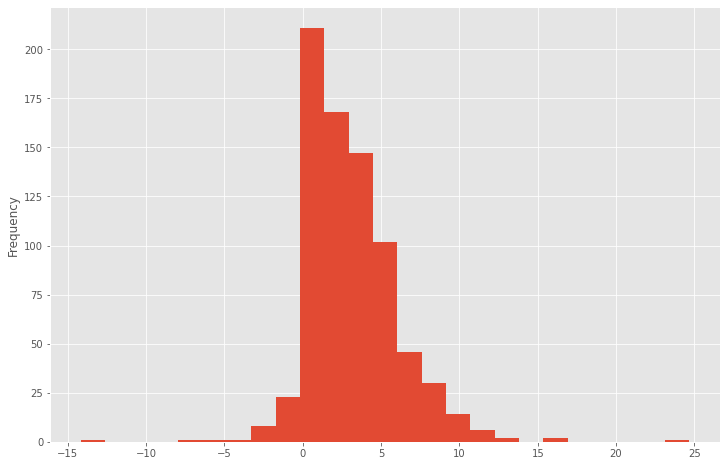

In [13]:
startup_clean['age_first_milestone_year'].dropna().plot(kind='hist', figsize=(12,8), bins=25)

### to check how to substitute the null of age_first_milestone_year

In [14]:
age_lmy_mean = startup_clean['age_last_milestone_year'].mean()
print("mean: "+str(age_lmy_mean))

#age_fmy_mode = startup_clean['age_first_milestone_year'].mode().iat[0]
#print("mode: "+ str(age_fmy_mode))

age_lmy_median = startup_clean['age_last_milestone_year'].median()
print("median: "+ str(age_lmy_mean))

mean: 4.7523412303664925
median: 4.7523412303664925


<AxesSubplot:ylabel='Frequency'>

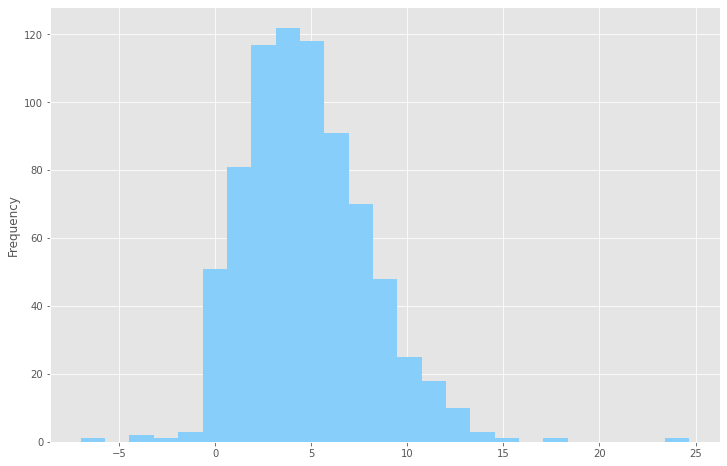

In [15]:
startup_clean['age_last_milestone_year'].dropna().plot(kind='hist', figsize=(12,8), bins=25, color='lightskyblue')

in order to avoid the null value on the fields 'age_first_milestone_year' and 'age_last_milestone_year' 
we procedeed in this way: <br>
    - calculate the mean of these value <br>
    - replace the nan with the mean

In [16]:
startup_clean['age_first_milestone_year']= startup_clean['age_first_milestone_year'].fillna(age_fmy_mean)
startup_clean['age_last_milestone_year']= startup_clean['age_last_milestone_year'].fillna(age_lmy_mean)

check on null values

In [17]:
startup.isnull().sum()

unamed:0                      0
state_code                    8
latitude                      8
longitude                     8
zip_code                      8
id                            8
city                          8
Unnamed: 6                  495
name                          8
labels                        8
founded_at                    8
closed_at                   590
first_funding_at              8
last_funding_at               8
age_first_funding_year        8
age_last_funding_year         8
age_first_milestone_year    159
age_last_milestone_year     159
relationships                 8
funding_rounds                8
funding_total_usd             8
milestones                    8
state_code.1                  9
is_CA                         8
is_NY                         8
is_MA                         8
is_TX                         8
is_otherstate                 8
category_code                 8
is_software                   8
is_web                        8
is_mobil

In [18]:
startup_clean.isnull().sum()

name                        0
age_first_funding_year      0
age_last_funding_year       0
age_first_milestone_year    0
age_last_milestone_year     0
relationships               0
funding_rounds              0
funding_total_usd(MLN)      0
is_CA                       0
is_TX                       0
is_NY                       0
is_MA                       0
is_otherstate               0
is_software                 0
is_web                      0
is_mobile                   0
is_enterprise               0
is_advertising              0
is_gamesvideo               0
is_ecommerce                0
is_biotech                  0
is_consulting               0
is_othercategory            0
has_angel                   0
has_VC                      0
has_roundA                  0
has_roundB                  0
has_roundC                  0
has_roundD                  0
avg_participants            0
has_succeded                0
dtype: int64

# Data Exploration

In [19]:
startup_founded = startup[startup['founded_at'].isna()==False].reset_index().drop(columns={'index'})

startup_closed = startup[startup['closed_at'].isna()==False].reset_index().drop(columns={'index'})

In [20]:
startup_founded.head(3)

,unamed:0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1.0,...,c:6669,0.0,1.0,0.0,0.0,0.0,0.0,1.00,0.0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1.0,...,c:16283,1.0,0.0,0.0,1.0,1.0,1.0,4.75,1.0,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1.0,...,c:65620,0.0,0.0,1.0,0.0,0.0,0.0,4.00,1.0,acquired


In [21]:
startup_closed.head(5)

,unamed:0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0.0,...,c:65806,1.0,1.0,0.0,0.0,0.0,0.0,1.00,1.0,closed
1,379,CA,37.406914,-122.090370,94043,c:22898,Mountain View,Mountain View CA 94043,Matisse Networks,0.0,...,c:22898,0.0,0.0,0.0,1.0,0.0,0.0,3.00,1.0,closed
2,835,CA,37.452992,-122.185098,94025,c:4829,Menlo Park,NaN,Center'd,0.0,...,c:4829,1.0,1.0,1.0,0.0,0.0,0.0,1.75,1.0,closed
3,531,KY,38.241467,-85.724511,40204,c:30290,Louisville,NaN,Resonant Vibes,0.0,...,c:30290,1.0,0.0,0.0,0.0,0.0,0.0,1.00,0.0,closed
4,898,VA,38.901301,-77.265158,22182,c:54177,Vienna,Vienna VA 22182,Invicta Networks,0.0,...,c:54177,1.0,0.0,0.0,0.0,0.0,0.0,1.00,0.0,closed


In [22]:
startup_founded['founded_at'] = pd.to_datetime(startup_founded['founded_at'])
len(startup_founded)

915

In [23]:
startup_closed['closed_at'] = pd.to_datetime(startup_closed['closed_at'])
len(startup_closed)

333

In [24]:
# calculation of founded startup
startup_founded['founded_at_ym'] = pd.Series()

for i in range(len(startup_founded)):
     startup_founded['founded_at_ym'][i] = startup_founded['founded_at'][i].strftime('%Y')
        
startup_founded['founded_at_ym']= startup_founded['founded_at_ym'].astype(int)


# calculation of closed startup
startup_closed['closed_at_ym'] = pd.Series()

for i in range(len(startup_closed)):
     startup_closed['closed_at_ym'][i] = startup_closed['closed_at'][i].strftime('%Y')
        
startup_closed['closed_at_ym']= startup_closed['closed_at_ym'].astype(int)

In [25]:
stgbf = startup_founded.groupby(by='founded_at_ym').agg({'unamed:0':'count'}).sort_values('founded_at_ym').reset_index()
stgbc = startup_closed.groupby(by='closed_at_ym').agg({'unamed:0':'count'}).sort_values('closed_at_ym').reset_index()


stgbf = stgbf.rename(columns={'unamed:0': '# startups founded','founded_at_ym':'year'})
stgbc = stgbc.rename(columns={'unamed:0': '# startups closed','closed_at_ym':'year'})

In [26]:
stgbfc = stgbf.merge(stgbc, how='left', on='year')
stgbfc = stgbfc.fillna(0)
stgbfc['# startups closed'] = stgbfc['# startups closed'].astype(int)
#stgbfc

The chart below allow us to check the number of startups founded and closed by year. As we can easily note the two trends are really different.

<AxesSubplot:xlabel='year'>

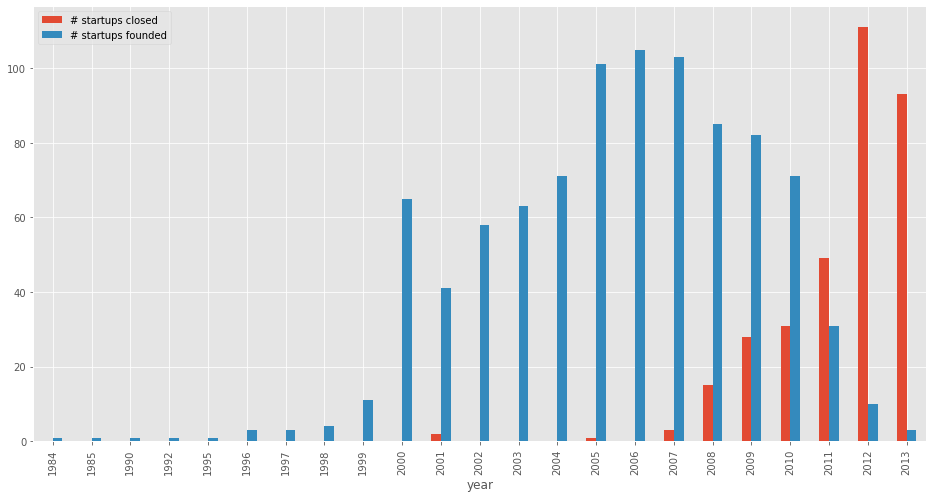

In [27]:
stgbfc.plot(figsize=(16,8), kind='bar', x='year', y=['# startups closed', '# startups founded'])

In [28]:
#stgbf.plot(figsize=(16,8), kind='bar', title='number of startups by  year of foundation', color='green')

In [29]:
#stgbc.plot(figsize=(16,8), kind='bar', title='number of startups closed by year', color='red')

We start checking with a boxplots chart the shape of our features

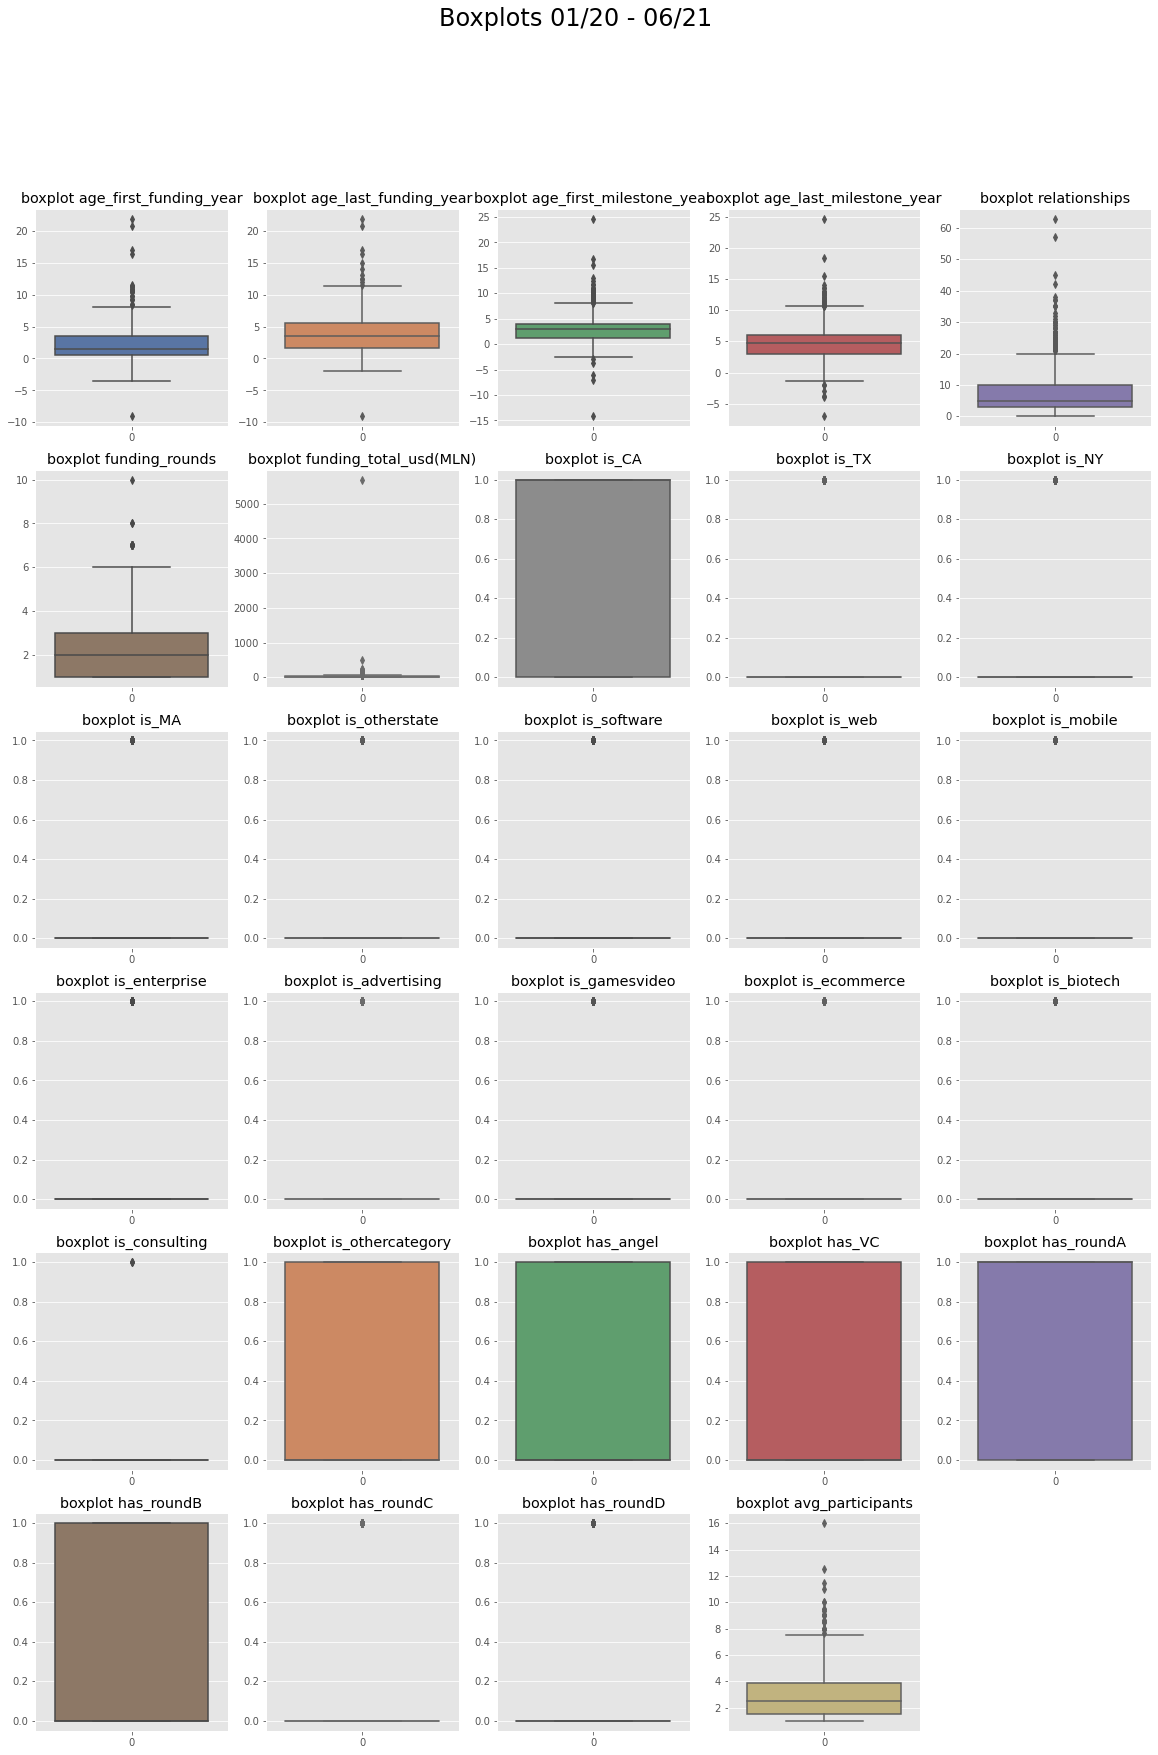

In [30]:
plt.subplots(figsize=(20,28))
c_ = sns.color_palette("deep", n_colors=30)
i = 1
for col in startup_clean.columns[1:-1]:
    plt.subplot(6,5,i)
    sns.boxplot(data=startup_clean[col],color=c_[i-1])
    #sns.swarmplot(data=startup_clean[col],color=".9")
    plt.title('boxplot '+ col)#   plt.xlim((0,1))
    i+=1
plt.suptitle("Boxplots 01/20 - 06/21",fontsize=24)
plt.show()

We repeat the same operation avoiding the binary features

In [31]:
columnsbox = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','relationships','funding_rounds','funding_total_usd(MLN)','avg_participants']

In [32]:
#sns.set_theme(style="whitegrid")

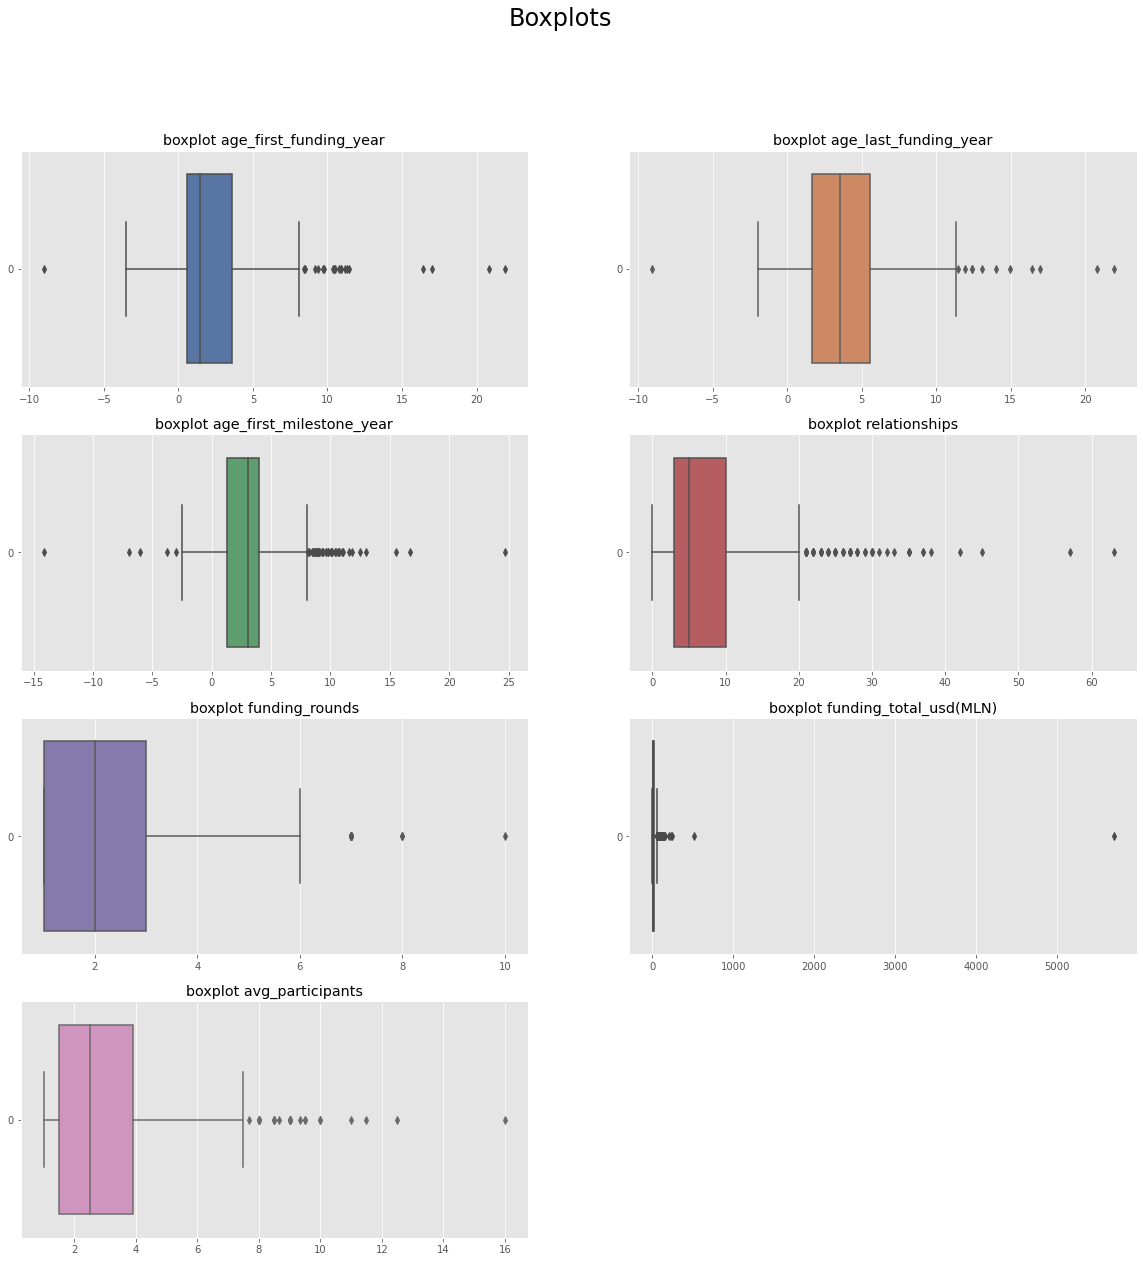

In [33]:
plt.subplots(figsize=(20,20))
c_ = sns.color_palette("deep",n_colors=30)
i = 1
for col in columnsbox:
    plt.subplot(4,2,i)
    sns.boxplot(data=startup_clean[col],color=c_[i-1], orient='h' )
    #sns.swarmplot(data=startup_clean[col],color=".9")
    plt.title('boxplot '+ col)#   plt.xlim((0,1))
    i+=1
plt.suptitle("Boxplots",fontsize=24)
plt.show()

In [34]:
startup_clean['funding_total_usd(MLN)'].sort_values()

754       0.011000
434       0.012000
827       0.015000
167       0.015000
585       0.019000
          ...     
694     211.403000
728     232.000100
497     238.209999
82      510.000000
364    5700.000000
Name: funding_total_usd(MLN), Length: 915, dtype: float64

In [35]:
startup_clean = startup_clean[startup_clean['funding_total_usd(MLN)']<5000]

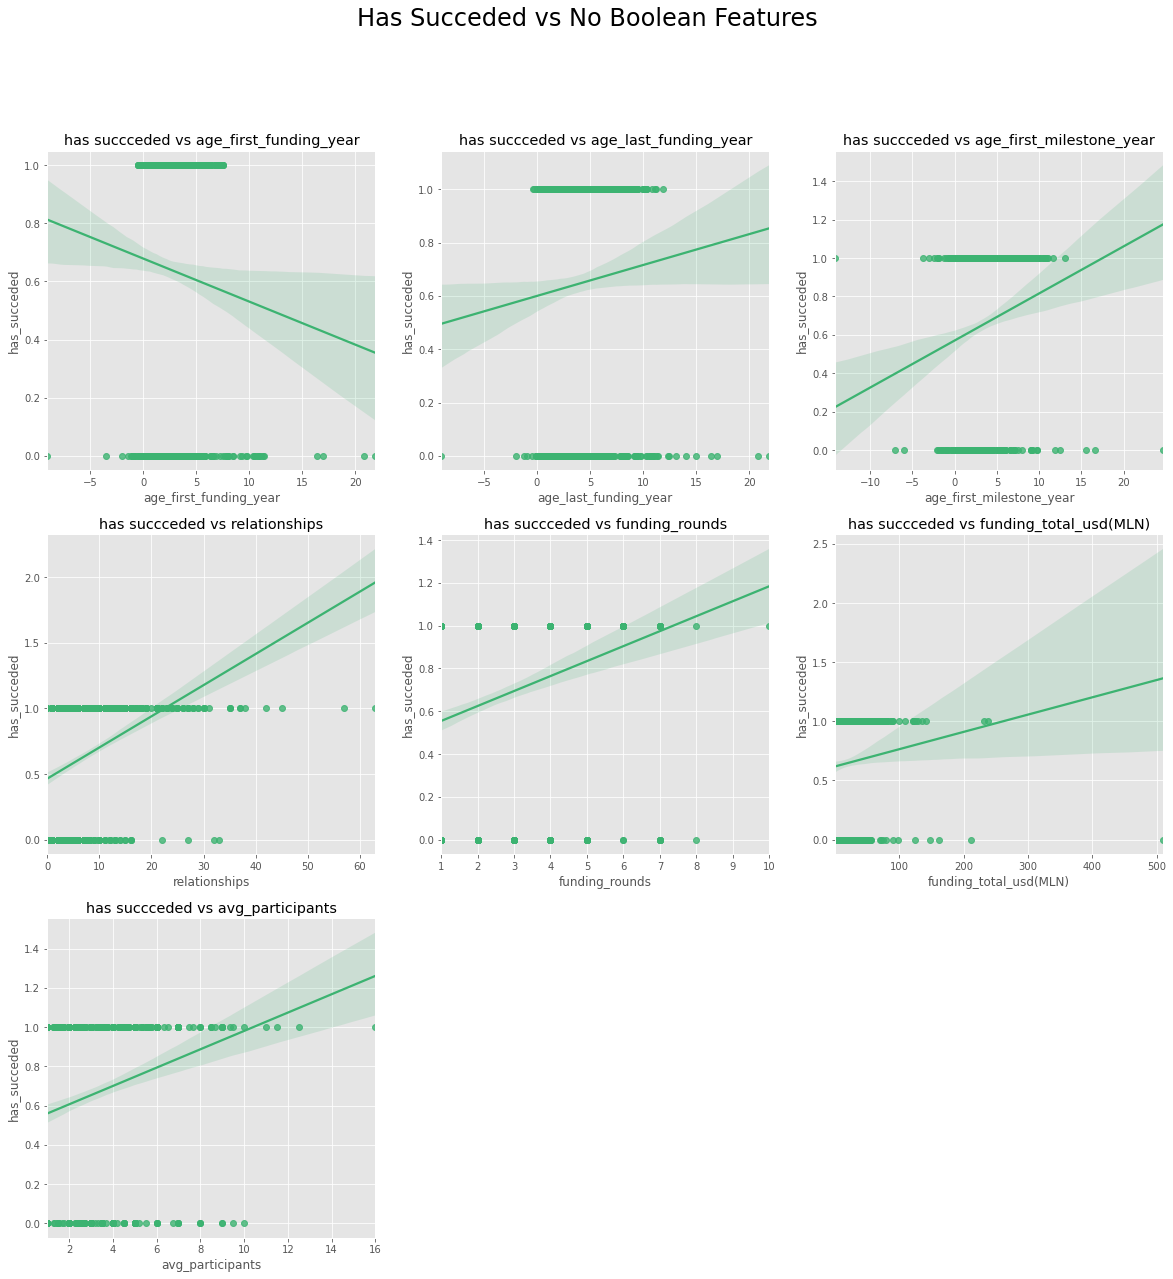

In [36]:
def plot_regs(df, features):
    plt.subplots(figsize=(20,20))
    i = 1
    for col in features:
        plt.subplot(3,3,i)
        sns.regplot(y = df['has_succeded'] , x = col, data = df, color='mediumseagreen') #, scatter_kws={'facecolors':df['color']})
        plt.title('has succceded vs '+ col)
        i+=1

regressors = startup_clean.columns[1:-1]
plot_regs(startup_clean, columnsbox)
#plt.savefig('correlations_week_{}'.format(end_date))
plt.suptitle("Has Succeded vs No Boolean Features",fontsize=24)
plt.show()

In [37]:
df_corr = startup_clean.iloc[:,:]
mat = df_corr.corr()
mat

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd(MLN),is_CA,is_TX,is_NY,...,is_consulting,is_othercategory,has_angel,has_VC,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,has_succeded
age_first_funding_year,1.000000,0.762462,0.495561,0.393506,-0.193347,-0.157557,0.096511,-0.010093,0.031011,-0.128894,...,-0.012773,0.116891,-0.344446,0.169238,-0.295462,-0.059056,0.033532,0.120354,0.111534,-0.077913
age_last_funding_year,0.762462,1.000000,0.609755,0.559571,0.069236,0.384743,0.351454,0.006415,0.014401,-0.142057,...,0.029728,0.095179,-0.354401,0.353422,-0.099681,0.261915,0.320806,0.314819,0.120627,0.071968
age_first_milestone_year,0.495561,0.609755,1.000000,0.778000,0.224742,0.176151,0.227316,0.033992,-0.001446,-0.087631,...,0.051959,0.028472,-0.262753,0.101599,0.014233,0.179731,0.189804,0.231209,0.048620,0.139513
age_last_milestone_year,0.393506,0.559571,0.778000,1.000000,0.322029,0.236541,0.232763,0.057756,0.004847,-0.083090,...,0.039180,-0.003171,-0.232418,0.082474,0.106223,0.242685,0.253254,0.232379,0.073837,0.227727
relationships,-0.193347,0.069236,0.224742,0.322029,1.000000,0.351950,0.232720,0.113234,-0.039446,0.055077,...,0.079849,-0.070024,-0.057034,-0.033040,0.317391,0.291010,0.256349,0.210019,0.115571,0.357279
funding_rounds,-0.157557,0.384743,0.176151,0.236541,0.351950,1.000000,0.461277,0.009291,-0.028074,0.011646,...,0.028587,-0.009586,0.012068,0.333924,0.261377,0.447377,0.441560,0.328603,0.043306,0.203357
funding_total_usd(MLN),0.096511,0.351454,0.227316,0.232763,0.232720,0.461277,1.000000,0.052290,-0.031699,-0.075609,...,0.000666,0.071738,-0.248286,0.190280,0.049122,0.298980,0.378800,0.353503,0.140597,0.092658
is_CA,-0.010093,0.006415,0.033992,0.057756,0.113234,0.009291,0.052290,1.000000,-0.227466,-0.383056,...,-0.022687,0.030305,-0.060989,-0.073174,0.075668,0.087546,0.075343,0.085756,0.069774,0.077570
is_TX,0.031011,0.014401,-0.001446,0.004847,-0.039446,-0.028074,-0.031699,-0.227466,1.000000,-0.077072,...,0.081230,0.058223,-0.051039,-0.012372,0.039047,-0.040642,0.021821,-0.053275,-0.026005,-0.053896
is_NY,-0.128894,-0.142057,-0.087631,-0.083090,0.055077,0.011646,-0.075609,-0.383056,-0.077072,1.000000,...,-0.020674,-0.013867,0.152537,-0.046431,0.017714,-0.064929,-0.059785,-0.062499,0.068202,0.058966


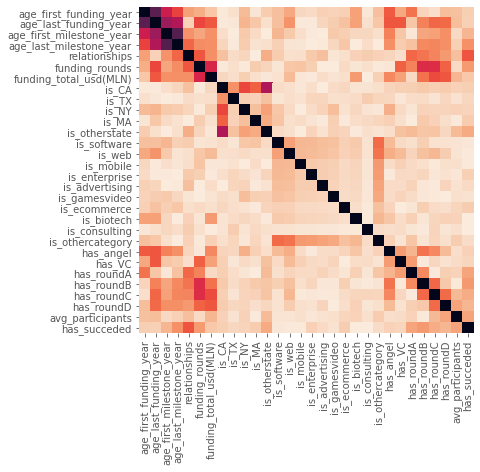

In [38]:
#plt.subplots(figsize=(7, 5))
f, ax = plt.subplots(figsize=(6,6))
#plt.figure(figsize=(20,20))
sns.heatmap(abs(mat),
            ax = ax,
            cmap = sns.cm.rocket_r,
            cbar=False
           )

#ax.set_title('Heatmap for {} - {}'.format(start_date,end_date))
plt.show()


# Kfold validation

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

function to get score of a model in a simpler way

In [40]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return fit.score(X_test, y_test)

In [41]:
X = startup_clean[['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year', 'relationships','funding_rounds', 'funding_total_usd(MLN)','is_CA','is_TX','is_NY'
        ,'is_MA', 'is_otherstate', 'is_software', 'is_web', 'is_mobile', 'is_enterprise','is_advertising','is_gamesvideo','is_ecommerce','is_biotech','is_consulting','is_othercategory','has_angel',
       'has_VC','has_roundA','has_roundB','has_roundC','has_roundD','avg_participants']].to_numpy()

#X1 =startup_clean[['age_first_funding_year', 'age_last_funding_year']]

y = startup_clean['has_succeded'].to_numpy()

In [42]:
print('shape of X:')
print(X.shape)
print('type of X:')
print(type(X))
print('shape of y:')
print(y.shape)
print('type of y:')
print(type(y))

shape of X:
(914, 29)
type of X:
<class 'numpy.ndarray'>
shape of y:
(914,)
type of y:
<class 'numpy.ndarray'>


In [97]:
X[0:1][0:1]

array([[2.2493, 3.0027, 4.6685, 6.7041, 3.    , 3.    , 0.375 , 1.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 1.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 1.    ]])

In [93]:
y[0:5]

array([1., 1., 1., 1., 0.])

In [46]:
#folds = StratifiedKFold(n_splits=10)

# Logistic Regression

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#fit = lr.fit(X_train, y_train)
#fit.score(X, y)

#for train_index, test_index in folds.split(X,y):
#    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
#    score_lr.append(get_score(LogisticRegression() ,X_train, X_test, y_train, y_test)) 

In [49]:
lr = LogisticRegression(solver='liblinear')

In [79]:
accuracy_lr = cross_val_score(lr, X, y, cv=10)

In [80]:
accuracy_lr= accuracy_lr.mean()
accuracy_lr

0.7307572861920688

# Random Forest

In [65]:
#rf=RandomForestClassifier(n_estimators=40)

In [102]:
cross_val_score(RandomForestClassifier(n_estimators=5), X, y, cv=10)#.mean()

array([0.7826087 , 0.64130435, 0.75      , 0.7173913 , 0.73626374,
       0.74725275, 0.75824176, 0.81318681, 0.73626374, 0.69230769])

In [204]:
accuracy_rf_i=pd.DataFrame(np.array([(0, 0.0)]), columns=['n_estimators','accuracy_rf'])

In [205]:
accuracy_rf_i

,n_estimators,accuracy_rf
0,0.0,0.0


In [208]:
for i in range(2,101):
      accuracy_rf = cross_val_score(RandomForestClassifier(n_estimators=i), X, y, cv=10).mean()
      accuracy_rf_i['n_estimators'][i-2] = i
      accuracy_rf_i['accuracy_rf'][i-2] = accuracy_rf
      accuracy_rf_i = accuracy_rf_i.append({'n_estimators':0, 'accuracy_rf':0}, ignore_index=True)

In [220]:
accuracy_rf_i=accuracy_rf_i[accuracy_rf_i['accuracy_rf']!=0]#.set_index()
accuracy_rf_i.columns

Index(['n_estimators', 'accuracy_rf'], dtype='object')

<AxesSubplot:xlabel='n_estimators'>

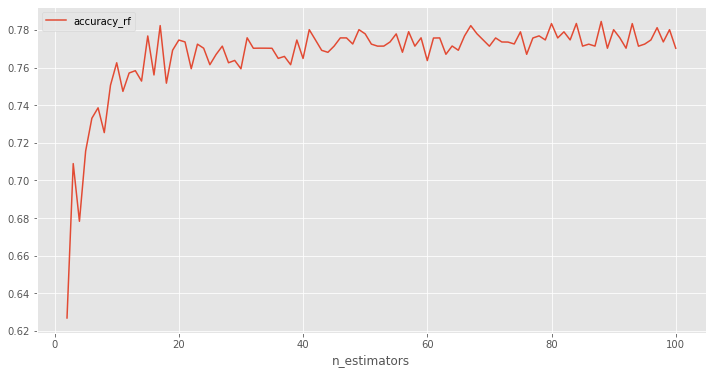

In [230]:
accuracy_rf_i.plot(kind='line', x='n_estimators',  y='accuracy_rf', figsize=(12,6))

In [228]:
accuracy_rf_i.sort_values('accuracy_rf').tail(3)

,n_estimators,accuracy_rf
78,80.0,0.783373
82,84.0,0.783421
86,88.0,0.784496


# Support Vector Machine